In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json



#url: The API endpoint for getting the latest cryptocurrency listings from CoinMarketCap's sandbox environment.
#parameters: A dictionary of parameters for the API request:
#'start':'1': Start at the first listing.
#'limit':'15': Limit the results to 15 listings.
#'convert':'USD': Convert the prices to USD.
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
#headers: A dictionary of HTTP headers to include in the request:
#'Accepts': 'application/json': Indicate that the client expects a JSON response.
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [2]:
type(data)

dict

In [65]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [48]:
#json normalise make the data prettier  
df=pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973464e+07,1.973464e+07,False,NaN,1,NaN,NaN,None,2024-08-02T13:54:00.000Z,65229.800582,4.285792e+10,18.9601,0.797537,0.808304,-3.738677,7.844063,-6.710234,2.453080,1.287286e+12,55.4189,1.369826e+12,None,2024-08-02T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
1,1027,Ethereum,ETH,ethereum,9183,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202532e+08,1.202532e+08,True,NaN,2,NaN,NaN,None,2024-08-02T13:53:00.000Z,3167.506927,1.932938e+10,1.8643,0.389085,-0.470314,-2.307794,-4.298374,-17.436641,1.184842,3.809027e+11,16.4022,3.809027e+11,None,2024-08-02T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
2,825,Tether USDt,USDT,tether,93414,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.145013e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-02T13:53:00.000Z,0.999491,6.691772e+10,15.3285,0.016193,0.003839,-0.052106,0.083998,-0.060956,-0.124614,1.144430e+11,4.9281,1.170085e+11,None,2024-08-02T13:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 17:29:02.736506
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459373e+08,1.459373e+08,False,NaN,4,NaN,NaN,None,2024-08-02T13:53:00.000Z,575.195127,2.091729e+09,14.6980,0.530691,0.376312,-0.532362,2.991888,-9.703652,-2.645907,8.394241e+10,3.6147,8.394241e+10,None,2024-08-02T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.652605e+08,5.813412e+08,True,NaN,5,NaN,NaN,None,2024-08-02T13:53:00.000Z,167.348032,4.360369e+09,19.1060,2.152429,-1.485498,-7.249313,16.765845,0.208897,14.144903,7.786044e+10,3.3528,9.728631e+10,None,2024-08-02T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
5,3408,USDC,USDC,usd-coin,21249,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.291631e+10,3.291631e+10,False,NaN,6,NaN,NaN,None,2024-08-02T13:53:00.000Z,1.000178,7.549178e+09,14.6024,0.017408,0.020664,0.008485,0.016329,-0.018987,-0.018703,3.292218e+10,1.4177,3.292218e+10,None,2024-08-02T13:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 17:29:02.736506
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-02T13:54:00.000Z,0.577557,1.976571e+09,-0.0116,1.063737,-4.949444,-3.015088,21.242110,10.588931,7.578683,3.234280e+10,1.3927,5.775575e+10,None,2024-08-02T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.453685e+11,1.453685e+11,True,NaN,8,NaN,NaN,None,2024-08-02T13:54:00.000Z,0.119164,8.729687e+08,29.6421,1.601824,-0.884268,-8.324906,-0.200604,-26.928490,-27.020545,1.732275e+10,0.7459,1.732275e+10,None,2024-08-02T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
8,11419,Toncoin,TON,toncoin,483,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.517022e+09,5.10

In [7]:
# we are going to automate the python script 


from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

def api_runner():
     global df
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

session = Session()
session.headers.update(headers)

try:
        response = session.get(url, params=parameters)
        response.raise_for_status()  # Raises HTTPError for bad responses
        data = response.json()  # Directly parse JSON response
        
        # Normalize and process data
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.to_datetime('now')
        df = pd.concat([df2, df2])  # Use pd.concat instead of deprecated append

        # Print or return DataFrame
        print(df)

except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Request error: {e}")
except Exception as e:
        print(f"Unexpected error: {e}")

 
 
        if df.empty:
            df = df2
        else:
            df = pd.concat([df, df2], ignore_index=True)
        
    
    

if not os.path.isfile(r'C:\Users\HP\Desktop\Python_DA\DataSet/API.csv'):
    df.to_csv(r'C:\Users\HP\Desktop\Python_DA\DataSet/API.csv', header='column_names')
            #looks for the csv file if it doesn't find it it will create it 
else:
    df.to_csv(r'C:\Users\HP\Desktop\Python_DA\DataSet/API.csv', mode='a', header=False) 
                  #here a stands for append ut append data in the csv not in panda bcz it has been deprecated 
                  
        # Call the function
# api_runner()
# to keep it in a dataframe 
    # Normalize and process data
   # Concatenate the new data to the existing DataFrame meaning adding rows to a datframe
 
 




       id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             11621   
1    1027      Ethereum    ETH      ethereum              9183   
2     825   Tether USDt   USDT        tether             93414   
3    1839           BNB    BNB           bnb              2203   
4    5426        Solana    SOL        solana               712   
5    3408          USDC   USDC      usd-coin             21249   
6      52           XRP    XRP           xrp              1359   
7      74      Dogecoin   DOGE      dogecoin              1032   
8   11419       Toncoin    TON       toncoin               483   
9    2010       Cardano    ADA       cardano              1219   
10   1958          TRON    TRX          tron              1006   
11   5805     Avalanche   AVAX     avalanche               759   
12   5994     Shiba Inu   SHIB     shiba-inu               852   
13   1831  Bitcoin Cash    BCH  bitcoin-cash               906   
14   6636 

NameError: name 'os' is not defined

In [49]:
import os
from time import time
 # Import time module
from time import sleep  # Import sleep function directly

for i in range(333):
    api_runner()  # Call the existing api_runner function
    print("API runner Completed")# run successfully then sleep for 60 second then run again
    sleep(60)  # Sleep for 60 seconds between API calls

# Explicitly exit the script (optional)
exit()

    
    

API runner Completed
API runner Completed
API runner Completed
API runner Completed
API runner Completed
API runner Completed
API runner Completed
API runner Completed


KeyboardInterrupt: 

In [50]:
   #Then to read in the file:
df34 = pd.read_csv(r'C:\Users\HP\Desktop\Python_DA\DataSet/API.csv')
df34

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11620,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.973426e+07,1.973426e+07,False,NaN,1,NaN,NaN,NaN,2024-08-01T16:21:00.000Z,63022.341586,3.667784e+10,35.6388,-0.414126,-5.409029,-2.965296,2.055577,-7.309377,2.076506,1.243699e+12,55.0468,1.323469e+12,NaN,2024-08-01T16:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-01 18:22:13.263847
1,1,1027,Ethereum,ETH,ethereum,9182,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202513e+08,1.202513e+08,True,NaN,2,NaN,NaN,NaN,2024-08-01T16:20:00.000Z,3117.334435,1.981863e+10,40.3750,-0.311792,-5.785575,-1.040057,-8.503650,-17.789750,1.129859,3.748636e+11,16.5851,3.748636e+11,NaN,2024-08-01T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-01 18:22:13.263847
2,2,825,Tether USDt,USDT,tether,93287,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.144955e+11,1.170681e+11,True,NaN,3,NaN,NaN,NaN,2024-08-01T16:20:00.000Z,1.000362,6.014884e+10,27.1822,0.079754,0.075311,0.051126,0.163147,0.109141,0.014772,1.145369e+11,5.0675,1.171104e+11,NaN,2024-08-01T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-01 18:22:13.263847
3,3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459373e+08,1.459373e+08,False,NaN,4,NaN,NaN,NaN,2024-08-01T16:20:00.000Z,557.281721,1.911926e+09,5.1416,-1.186572,-5.119905,-1.561639,-2.962294,-7.179795,-3.870351,8.132821e+10,3.5982,8.132821e+10,NaN,2024-08-01T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-01 18:22:13.263847
4,4,5426,Solana,SOL,solana,711,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.652663e+08,5.813454e+08,True,NaN,5,NaN,NaN,NaN,2024-08-01T16:20:00.000Z,161.630392,4.161923e+09,64.4478,-1.100688,-10.781707,-5.131686,9.411840,-1.935760,13.428249,7.520118e+10,3.3271,9.396308e+10,NaN,2024-08-01T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-01 18:22:13.263847
5,5,3408,USDC,USDC,usd-coin,21233,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.309613e+10,3.309613e+10,False,NaN,6,NaN,NaN,NaN,2024-08-01T16:20:00.000Z,1.000476,6.995350e+09,33.1614,0.052371,0.048304,0.044309,0.047687,0.042249,0.045884,3.311188e+10,1.4655,3.311188e+10,NaN,2024-08-01T16:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-01 18:22:13.263847
6,6,52,XRP,XRP,xrp,1358,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.596087e+10,9.998741e+10,False,NaN,7,NaN,NaN,NaN,2024-08-01T16:21:00.000Z,0.587020,2.055845e+09,-14.7495,-1.186108,-9.744144,-4.710875,21.923536,13.557954,11.552094,3.285016e+10,1.4534,5.870202e+10,NaN,2024-08-01T16:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-01 18:22:13.263847
7,7,11419,Toncoin,TON,toncoin,480,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.516984e+09,5.109862e+09,True,NaN,8,3.414167e+09,2.300459e+10,NaN,2024-08-01T16:20:00.000Z,6.737981,2.625387e+08,51.8063,0.064556,-1.811263,2.930528,-15.815364,4.005067,22.358043,1.695939e+10,0.7503,3.443015e+10,NaN,2024-08-01T16:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-01 18:22:13.263847
8,8,74,Dogecoin,DOGE,dogecoin,1030,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-

In [51]:
# Breakdown:
# pd.set_option: This function is used to configure pandas' display options. In this case, it's setting the format for floating-point numbers.

# 'display.float_format': This option specifies the format for floating-point numbers. By setting this option, you can control how pandas displays floating-point numbers in DataFrames.

# lambda x: '%.5f' % x: This is a lambda function that defines a custom formatting rule for floating-point numbers. Let's break down what this lambda function does:

# lambda x:: This starts the definition of a lambda function, which is an anonymous (i.e., unnamed) function in Python. x is the parameter of this lambda function.
# '%.5f' % x: This is a format string used to format the floating-point number x. Specifically:
# '%.5f': This is a format specification that means "format the number as a floating-point number with 5 digits after the decimal point".
# % x: This applies the format to the number x.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [52]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11621,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19734637.00000,19734637.00000,False,NaN,1,NaN,NaN,None,2024-08-02T13:54:00.000Z,65229.80058,42857922538.60963,18.96010,0.79754,0.80830,-3.73868,7.84406,-6.71023,2.45308,1287286436075.98462,55.41890,1369825812230.33008,None,2024-08-02T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
1,1027,Ethereum,ETH,ethereum,9183,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253156.18023,120253156.18023,True,NaN,2,NaN,NaN,None,2024-08-02T13:53:00.000Z,3167.50693,19329376739.57409,1.86430,0.38909,-0.47031,-2.30779,-4.29837,-17.43664,1.18484,380902705167.25671,16.40220,380902705167.26001,None,2024-08-02T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
2,825,Tether USDt,USDT,tether,93414,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114501280130.73694,117068083204.24847,True,NaN,3,NaN,NaN,None,2024-08-02T13:53:00.000Z,0.99949,66917719268.24661,15.32850,0.01619,0.00384,-0.05211,0.08400,-0.06096,-0.12461,114443035891.34460,4.92810,117008533289.56000,None,2024-08-02T13:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-02 17:29:02.736506
3,1839,BNB,BNB,bnb,2203,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937279.79940,145937279.79940,False,NaN,4,NaN,NaN,None,2024-08-02T13:53:00.000Z,575.19513,2091729007.60356,14.69800,0.53069,0.37631,-0.53236,2.99189,-9.70365,-2.64591,83942412147.20540,3.61470,83942412147.21001,None,2024-08-02T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
4,5426,Solana,SOL,solana,712,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,465260538.47411,581341229.91326,True,NaN,5,NaN,NaN,None,2024-08-02T13:53:00.000Z,167.34803,4360368683.32001,19.10600,2.15243,-1.48550,-7.24931,16.76585,0.20890,14.14490,77860435658.08333,3.35280,97286310967.83000,None,2024-08-02T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
5,3408,USDC,USDC,usd-coin,21249,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32916314562.83100,32916314562.83100,False,NaN,6,NaN,NaN,None,2024-08-02T13:53:00.000Z,1.00018,7549178243.21351,14.60240,0.01741,0.02066,0.00848,0.01633,-0.01899,-0.01870,32922184958.36400,1.41770,32922184958.36000,None,2024-08-02T13:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-02 17:29:02.736506
6,52,XRP,XRP,xrp,1359,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-02T13:54:00.000Z,0.57756,1976570715.32224,-0.01160,1.06374,-4.94944,-3.01509,21.24211,10.58893,7.57868,32342804519.29640,1.39270,57755746570.21000,None,2024-08-02T13:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-02 17:29:02.736506
7,74,Dogecoin,DOGE,dogecoin,1032,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145368516383.70526,145368516383.70526,True,NaN,8,NaN,NaN,None,2024-08-02T13:54:00.000Z,0.11916,872968713.76162,29.64210,1.60182,-0.88427,-8.32491,-0.20060,-26.92849,-27.02054,17322750998.91433,0.74590,17322750998.91000,None,2024-08-02T13:54:00.000Z,NaN,NaN,NaN,N

In [53]:
# Group the DataFrame by 'name' and calculate the mean of specified columns
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h',
                                       'quote.USD.percent_change_24h',
                                       'quote.USD.percent_change_7d',
                                       'quote.USD.percent_change_30d',
                                       'quote.USD.percent_change_60d',
                                       'quote.USD.percent_change_90d']].mean()

# Display the resulting DataFrame
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.79754,0.80830,-3.73868,7.84406,-6.71023,2.45308
Ethereum,0.38909,-0.47031,-2.30779,-4.29837,-17.43664,1.18484
Tether USDt,0.01619,0.00384,-0.05211,0.08400,-0.06096,-0.12461
BNB,0.53069,0.37631,-0.53236,2.99189,-9.70365,-2.64591
Solana,2.15243,-1.48550,-7.24931,16.76585,0.20890,14.14490
USDC,0.01741,0.02066,0.00848,0.01633,-0.01899,-0.01870
XRP,1.06374,-4.94944,-3.01509,21.24211,10.58893,7.57868
Dogecoin,1.60182,-0.88427,-8.32491,-0.20060,-26.92849,-27.02054
Toncoin,0.49641,-2.55510,-1.93427,-15.12050,-0.30093,16.47396


In [54]:
df4=df3.stack()
df4
# Because we do not want the 

name                                      
Bitcoin       quote.USD.percent_change_1h      0.79754
              quote.USD.percent_change_24h     0.80830
              quote.USD.percent_change_7d     -3.73868
              quote.USD.percent_change_30d     7.84406
              quote.USD.percent_change_60d    -6.71023
              quote.USD.percent_change_90d     2.45308
Ethereum      quote.USD.percent_change_1h      0.38909
              quote.USD.percent_change_24h    -0.47031
              quote.USD.percent_change_7d     -2.30779
              quote.USD.percent_change_30d    -4.29837
              quote.USD.percent_change_60d   -17.43664
              quote.USD.percent_change_90d     1.18484
Tether USDt   quote.USD.percent_change_1h      0.01619
              quote.USD.percent_change_24h     0.00384
              quote.USD.percent_change_7d     -0.05211
              quote.USD.percent_change_30d     0.08400
              quote.USD.percent_change_60d    -0.06096
              quote.US

In [55]:
type(df4)
# it is now a series we cannot treat it as a dataframe so we have to put it back to a dataframe 

pandas.core.series.Series

In [15]:
#to put i back to a dataframe we use to_frame as follows 
df5= df4.to_frame(name='values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.797537
             quote.USD.percent_change_24h   0.808304
             quote.USD.percent_change_7d   -3.738677
             quote.USD.percent_change_30d   7.844063
             quote.USD.percent_change_60d  -6.710234
             quote.USD.percent_change_90d   2.453080
Ethereum     quote.USD.percent_change_1h    0.389085
             quote.USD.percent_change_24h  -0.470314
             quote.USD.percent_change_7d   -2.307794
             quote.USD.percent_change_30d  -4.298374
             quote.USD.percent_change_60d -17.436641
             quote.USD.percent_change_90d   1.184842
Tether USDt  quote.USD.percent_change_1h    0.016193
             quote.USD.percent_change_24h   0.003839
             quote.USD.percent_change_7d   -0.052106
             quote.USD.percent_change_30d   0.083998
             quote.USD.percent_change_60d  -0.060956
             quote.USD.percent_change_90d  -0.124614
BNB          quote.USD.percent_change_1h    0.530691
             quote.USD.percent_change_24h   0.376312
             quote.USD.percent_change_7d   -0.532362
             quote.USD.percent_change_30d   2.991888
             quote.USD.percent_change_60d  -9.703652
             quote.USD.percent_change_90d  -2.645907
Solana       quote.USD.percent_change_1h    2.152429
             quote.USD.percent_change_24h  -1.485498
             quote.USD.percent_change_7d   -7.249313
             quote.USD.percent_change_30d  16.765845
             quote.USD.percent_change_60d   0.208897
             quote.USD.percent_change_90d  14.144903
USDC         quote.USD.percent_change_1h    0.017408
             quote.USD.percent_change_24h   0.020664
             quote.USD.percent_change_7d    0.008485
             quote.USD.percent_change_30d   0.016329
             quote.USD.percent_change_60d  -0.018987
             quote.USD.percent_change_90d  -0.018703
XRP          quote.USD.percent_change_1h    1.063737
             quote.USD.percent_change_24h  -4.949444
             quote.USD.percent_change_7d   -3.015088
             quote.USD.percent_change_30d  21.242110
             quote.USD.percent_change_60d  10.588931
             quote.USD.percent_change_90d   7.578683
Dogecoin     quote.USD.percent_change_1h    1.601824
             quote.USD.percent_change_24h  -0.884268
             quote.USD.percent_change_7d   -8.324906
             quote.USD.percent_change_30d  -0.200604
             quote.USD.percent_change_60d -26.928490
             quote.USD.percent_change_90d -27.020545
Toncoin      quote.USD.percent_change_1h    0.496409
             quote.USD.percent_change_24h  -2.555105
             quote.USD.percent_change_7d   -1.934265
             quote.USD.percent_change_30d -15.120503
             quote.USD.percent_change_60d  -0.300930
             quote.USD.percent_change_90d  16.473965
Cardano      quote.USD.percent_change_1h    0.789549
             quote.USD.percent_change_24h  -1.767872
             quote.USD.percent_change_7d   -6.599142
             quote.USD.percent_change_30d  -6.095696
             quote.USD.percent_change_60d -15.338179
             quote.USD.percent_change_90d -17.813966
TRON         quote.USD.percent_change_1h    0.371523
             quote.USD.percent_change_24h  -1.935613
             quote.USD.percent_change_7d   -7.649923
             quote.USD.percent_change_30d  -1.956220
             quote.USD.percent_change_60d  11.079380
             quote.USD.percent_change_90d   2.916758
Avalanche    quote.USD.percent_change_1h    1.671074
             quote.USD.percent_change_24h  -1.038106
             quote.USD.percent_change_7d   -9.621709
             quote.USD.percent_change_30d  -7.099981
             quote.USD.percent_change_60d -30.073601
             quote.USD.percent_change_90d -29.588325
Shiba Inu    quote.USD.percent_change_1h    1.227846
             quote.USD.percent_change_24h  -0.912567
             quote

In [56]:
type(df5)

pandas.core.frame.DataFrame

In [57]:
df5.count()

values    90
dtype: int64

In [20]:
# we need our dataframe to have an index willcreate it with reset_index
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.797537
1,Bitcoin,quote.USD.percent_change_24h,0.808304
2,Bitcoin,quote.USD.percent_change_7d,-3.738677
3,Bitcoin,quote.USD.percent_change_30d,7.844063
4,Bitcoin,quote.USD.percent_change_60d,-6.710234
5,Bitcoin,quote.USD.percent_change_90d,2.453080
6,Ethereum,quote.USD.percent_change_1h,0.389085
7,Ethereum,quote.USD.percent_change_24h,-0.470314
8,Ethereum,quote.USD.percent_change_7d,-2.307794
9,Ethereum,quote.USD.percent_change_30d,-4.298374


In [58]:
df7= df6.rename(columns={'level_1' :'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.79754
1,Bitcoin,quote.USD.percent_change_24h,0.80830
2,Bitcoin,quote.USD.percent_change_7d,-3.73868
3,Bitcoin,quote.USD.percent_change_30d,7.84406
4,Bitcoin,quote.USD.percent_change_60d,-6.71023
5,Bitcoin,quote.USD.percent_change_90d,2.45308
6,Ethereum,quote.USD.percent_change_1h,0.38909
7,Ethereum,quote.USD.percent_change_24h,-0.47031
8,Ethereum,quote.USD.percent_change_7d,-2.30779
9,Ethereum,quote.USD.percent_change_30d,-4.29837


In [60]:
#we are going to change the name of the quote.USD 
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.79754
1,Bitcoin,24h,0.80830
2,Bitcoin,7d,-3.73868
3,Bitcoin,30d,7.84406
4,Bitcoin,60d,-6.71023
5,Bitcoin,90d,2.45308
6,Ethereum,1h,0.38909
7,Ethereum,24h,-0.47031
8,Ethereum,7d,-2.30779
9,Ethereum,30d,-4.29837


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


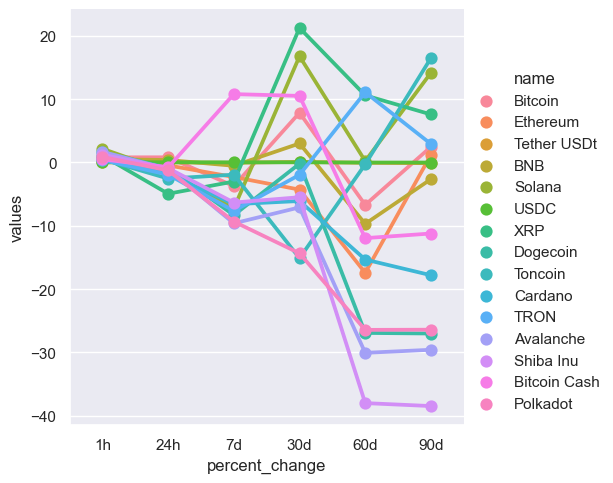

In [62]:
sns.catplot(x='percent_change', y= 'values', hue = 'name', data=df7, kind='point')
#hue is like legend

In [68]:
df8=  df[['name','quote.USD.price','timestamp']]
#If we want to look at Bitcoin for example 

#df8 = df8.query("name== 'Bitcoin'")
df8


,name,quote.USD.price,timestamp
0,Bitcoin,65229.80058,2024-08-02 17:29:02.736506
1,Ethereum,3167.50693,2024-08-02 17:29:02.736506
2,Tether USDt,0.99949,2024-08-02 17:29:02.736506
3,BNB,575.19513,2024-08-02 17:29:02.736506
4,Solana,167.34803,2024-08-02 17:29:02.736506
5,USDC,1.00018,2024-08-02 17:29:02.736506
6,XRP,0.57756,2024-08-02 17:29:02.736506
7,Dogecoin,0.11916,2024-08-02 17:29:02.736506
8,Toncoin,6.65065,2024-08-02 17:29:02.736506
9,Cardano,0.38533,2024-08-02 17:29:02.736506


<Axes: xlabel='quote.USD.price', ylabel='timestamp'>

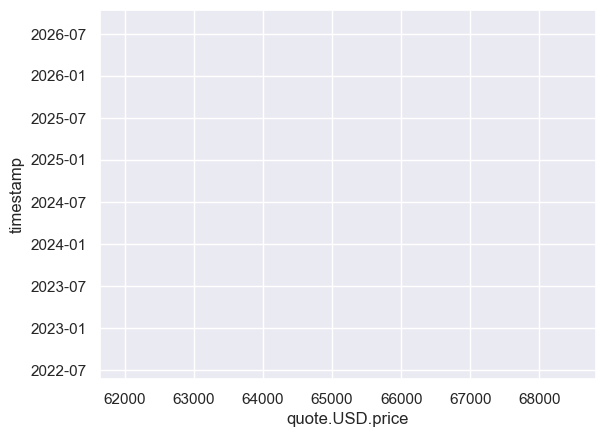

In [67]:
#sns.set_theme(style ='darkgrid')
#sns.lineplot(x='quote.USD.price', y='timestamp', data = df8)